<a href="https://colab.research.google.com/github/swapnalishamrao/Supervised_ML_Classification_Project_2/blob/main/Supervised_ML_Classification_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='#3792cb'><u>**Bank Marketing Effectiveness Prediction**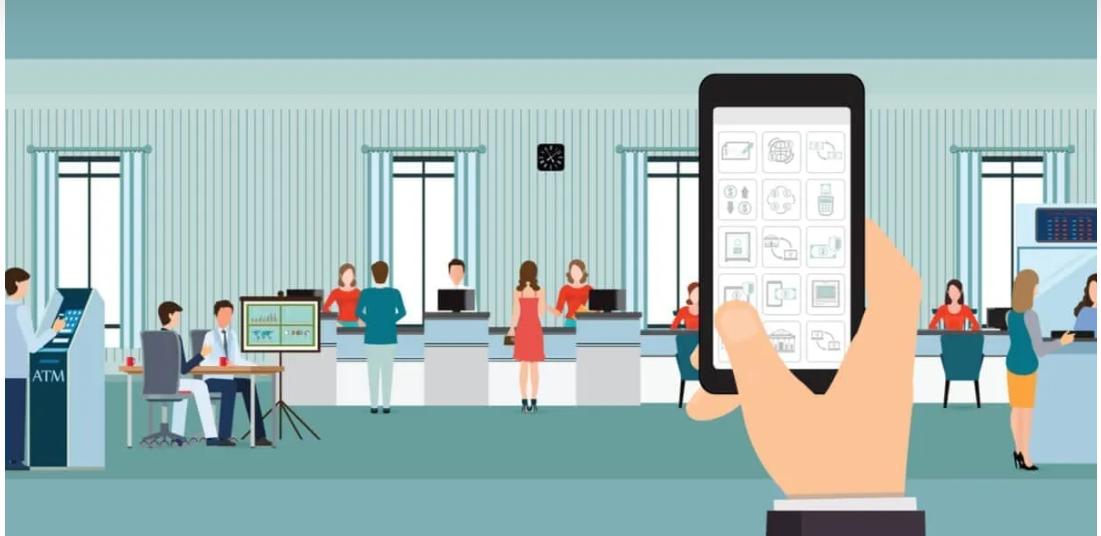

##### **Project Type**    - Supervised ML Classification
##### **Contribution**    - Individual
##### **Name**            - Swapnali Shamrao Mane

# **Project Summary -**


This project focuses on using machine learning to predict the success of bank marketing campaigns using a dataset provided by a Portuguese banking institution. The dataset contains 45,211 observations with 17 columns, including features like age, job, marital status, education, and balance. The primary goal is to build a classification model that can predict whether a client will respond positively or negatively to a campaign. This predictive model can provide valuable insights into how various factors influence campaign effectiveness, enabling banks to target their customers more effectively.

The project began with data exploration and preprocessing. Descriptive statistics were computed, and various visualizations, including distplots, count plots, and boxplots, were created to gain a better understanding of the dataset. Some columns contained a significant number of unknown values, which were treated as null and handled accordingly. Features with more than 50% null values were removed as they would negatively impact model performance. Outliers were identified and addressed using the interquartile range for specific numerical variables.

The analysis revealed several insights:

* Most term deposits are subscribed to by clients between the ages of 30 and 36.
* Clients with blue-collar jobs are less likely to subscribe to term deposits compared to those with managerial roles.
* Married clients are more likely to subscribe, while divorced clients are less likely.
* Education beyond primary level increases the likelihood of subscribing.
* Clients with no credit in default are more likely to subscribe.
* Housing and personal loans influence subscription decisions.
* The method of contact, as well as the number of calls, plays a role.
* The month of May stands out with a significantly higher subscription rate.
* The duration of contact and the absence of other loans impact subscriptions.

To prepare the data for modeling, label encoding and one-hot encoding were used for categorical variables, depending on their cardinality. Addressing class imbalance was crucial, as only 11.7% of clients subscribed to term deposits. This was resolved using the Synthetic Minority Oversampling Technique (SMOTE). Additionally, the dataset was scaled using MinMaxScaler.

Several classification models were trained, including Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, XGBoost, K Nearest Neighbors, Naive Bayes, Support Vector Machines. Cross-validation improved the performance of each model. The XGBoost model, in particular, emerged as the best-performing one, with high accuracy, precision, recall, F1-score, and ROC AUC score, making it suitable for predicting term deposit subscriptions.

Feature importance was analyzed using SHAP (SHapley Additive exPlanations) techniques, which identified the most influential factors in the model's predictions. It was found that lower values for most input features positively influenced subscription predictions, while higher values had a negative impact.

However, it's essential to recognize that building a robust machine learning model can be challenging. Extensive tuning and testing are often required to ensure accurate and reliable predictions. Future work may involve further model refinement, hyperparameter tuning, and exploring advanced techniques to enhance predictive performance.

In conclusion, this project successfully used machine learning to predict the effectiveness of bank marketing campaigns. It provided valuable insights into client behavior and highlighted the importance of various factors in subscription decisions. The XGBoost model, with Hyperparameter tunning, proved to be the most accurate in predicting term deposit subscriptions. This project's findings can assist the banking institution in refining its marketing strategies and improving customer targeting.



# **GitHub Link -**

https://github.com/swapnalishamrao/Supervised_ML_Classification_Project_2

# **Problem Statement**

This project analyses data from a Portuguese bank's phone-based marketing campaigns to predict whether clients will subscribe to a term deposit ('yes' or 'no'). The dataset includes client details and campaign information. We clean and process the data, handle class imbalance, build prediction models, and evaluate their performance. The goal is to improve marketing campaign targeting and effectiveness.

# ***Let's Begin !***

## ***Know Your Data***

## **Importing Library and connecting drive**

In [1]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# For building Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

!pip install shap
# For model explainability
import shap

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.6 MB/s eta 0:00:00


In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv(r"/content/drive/MyDrive/Supervised_ML_Classification_project-2/bank-full.csv", sep =";")

### **Dataset First View**

In [4]:
# First Five Observations
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Last five observations
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## **<u>Data Inispection</u>**

In [6]:
# Checking shape of the dataset
df.shape

(45211, 17)

Dataset having 45211 observations and 17 columns.

In [7]:
# Checking columns name of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### **<u>Data Description</u>**

- age: age of client (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- balance: Account balance of client
- day: last contact day of the month
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y (target Variable) - has the client subscribed a term deposit? (binary: 'yes','no')

### **Dataset Information**

In [8]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


1.In the dataset, there are object, float64, and int64 dtypes features present.

2.Dataset is having numerical and categorical data.

3.Mixed data (Numerical+Categorical)

4.There are 17 features

5.'y' is the output

In [9]:
# Basic description of Dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


## **<u>Data Wrangling and Feature Engineering</u>**

In [10]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [11]:
# Checking for number of null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

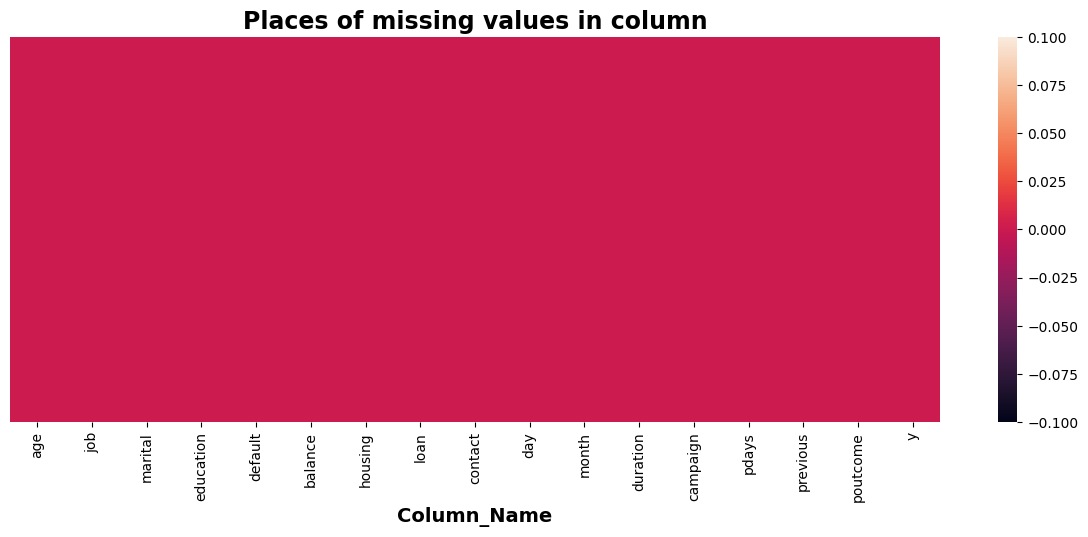

In [12]:
# No missing Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

Dataset having 0 null values.

1.Dataset having 45211 observations and 17 features


2.In the dataset, there are object, float64, and int64 dtypes features present.

3.Dataset is having numerical and categorical data.

4.Mixed data (Numerical+Categorical)

5.'y' is the output

6.Dataset having 0 duplicate values